<a href="https://colab.research.google.com/github/cdavis94-school/s23-CS167-Notes/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Christian Davis

Proposed Points (out of 25):
Description/Writing	I think I deserve	Actual Grade	Notes
1: Problem	          2/2	    /2	
2: Data Prep	        2/2	    /2	
3: Research	          8/10	  /10	
4: Analysis	          9/10	  /10	
5: Bumps in the Road.	1/1	    /1	
Total	                22/25	  /25	

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

Problem being solved: predicting if a player will hit over 30 homeruns based off of other batting statistics 

Data prep: on another file I used the pybaseball library to create a batting statistic csv file with all MLB batter statistics from 2002-2022. I then created a new collumn that said whether or not a batter hit over 30 homeruns in a season. Additionally all data used was normalized to create balance between counting stats (whole numbers) and average s

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
#holy imports batman
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from IPython.display import Image
import keras
import sys
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import pandas
#data was acquired in another personal project using the pybaseball library. https://www.youtube.com/watch?v=ZO3HAVm9IdQ&ab_channel=Dataquest
#data wasn't predicting total HR's with much accuracy so i changed the dataset and goal to see if it could predict if a player hits over 30 in a season
path = '/content/drive/MyDrive/datasets/batting.csv'
data = pandas.read_csv(path)

In [ ]:
data = data[['Age','G','AB','PA','H','1B','R','RBI','SO','AVG','HR_30','SLG','OBP']]
predictors = data.columns.drop('HR_30')
target = "HR_30"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)


In [ ]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

# 3. Research

Put your code and your experiments here.

In [ ]:
#PCA
extractor = PCA(n_components=2, whiten=True)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

# transform your train_data and _test_data
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

#build and test your model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.926914968376669


In [ ]:
#perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
HR_predictions = perc.predict(test_data)

#output accuracy
print("Homerun accuracy:", metrics.accuracy_score(test_sln, HR_predictions))

Homerun accuracy: 0.9388615600843289


Accuracy:  0.9880534082923401


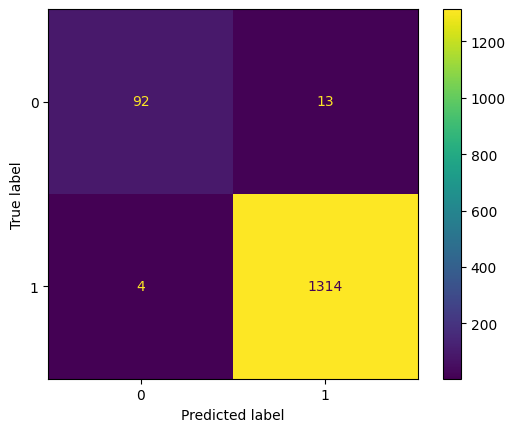

In [ ]:
#MLP
mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

# Confusion Matrix
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

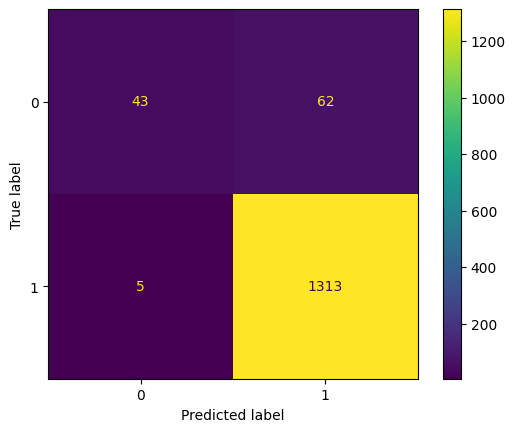

In [ ]:
#SVM
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

In [ ]:
#Neural Networks
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=12))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [ ]:
x = data.drop('HR_30', axis=1)
y = data['HR_30']

hist = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
57/57 [==============================] - 7s 7ms/step - loss: 20.6718 - mae: 20.6718 - val_loss: 3.6786 - val_mae: 3.6786
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 7.1657 - mae: 7.1657 - val_loss: 4.5433 - val_mae: 4.5433
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 4.6091 - mae: 4.6091 - val_loss: 1.4662 - val_mae: 1.4662
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 6.4559 - mae: 6.4559 - val_loss: 4.3331 - val_mae: 4.3331
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 2.6850 - mae: 2.6850 - val_loss: 3.3591 - val_mae: 3.3591
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 2.3474 - mae: 2.3474 - val_loss: 0.5714 - val_mae: 0.5714
Epoch 7/50
57/57 [==============================] - 0s 5ms/step - loss: 1.2901 - mae: 1.2901 - val_loss: 1.6562 - val_mae: 1.6562
Epoch 8/50
57/57 [==============================] - 0s 5ms/step - loss: 1.7762 - mae: 1.

[]

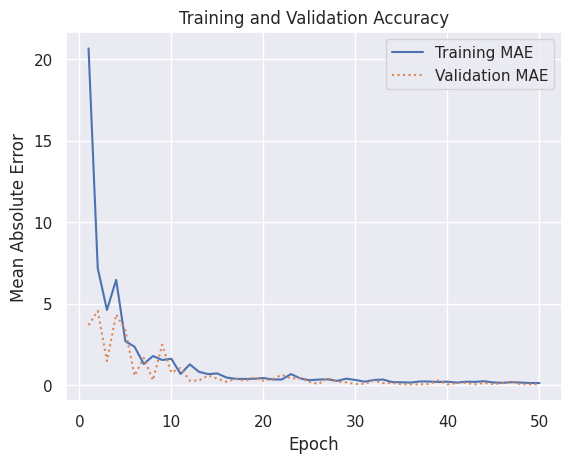

In [ ]:
sns.set()

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [1]:
#convolutional neural networks
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [21]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images, labels = [], []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train, y_train, x_test, y_test = [], [], [], []

In [22]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/train/Covid', 0)

x_train += images
y_train += labels

images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/train/Normal', 0)

x_train += images
y_train += labels

images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/train/Viral_Pneumonia', 0)

x_train += images
y_train += labels

In [24]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/test/Covid', 0)

x_test += images
y_test += labels

images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/test/Normal', 0)

x_test += images
y_test += labels

images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Covid19-dataset/test/Viral_Pneumonia', 0)

x_test += images
y_test += labels

In [27]:
import numpy as np
x_train = np.array(x_train) / 255 # normalize pixel values
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 222, 222, 32)            896         
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 111, 111, 32)            0           
                                                                                
 conv2d_1 (Conv2D)                  (None, 109, 109, 64)            18496       
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 54, 54, 64)              0           
                                                                                
 conv2d_2 (Conv2D)                  (None, 52, 52, 64)              36928       
                                                                                
 max_poo

In [28]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Epoch 1/20
26/26 [==============================] - 15s 50ms/step - loss: 0.1785 - accuracy: 0.9602 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
26/26 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
26/26 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_

[]

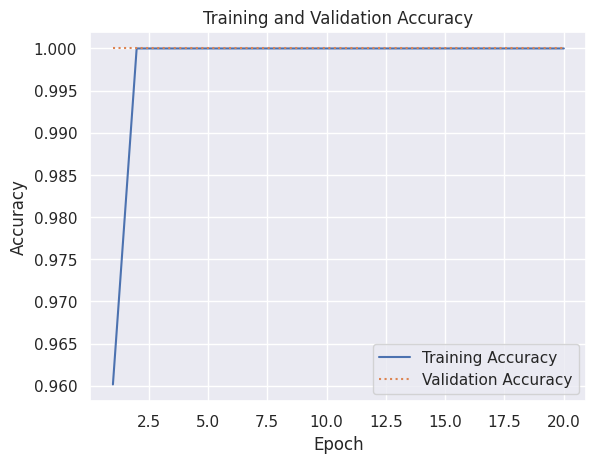

In [29]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I believe the best processing model for the baseball data was MLP at 98.8% accuracy. Throughout the research I realized how difficult it is to predect the exact number of homeruns a player hit based off their stats. This was expected since success in other stats don't direct correlate to power. If I had more time to give to the project I would have liked to find a way to convert each players homeruns hit to a range of +/- 5 and see if the HR prediction would fall within that range. As is i think the prediction criteria will lead to an artificially high success rate since any player with poor performance likely didn't cross the 30 HR threshhold. By predicting all players will hit below 30 HR's the models would have come up with an acceptable success rate since most players don't cross that line. I believe the MLP model was most successful because the output was continuous in nature. I also attempted a CNN model utilizing xrays to predict Covid, Pneumonia, or no diagnosis. However, this model quickly came up with 100% accuracy, which if true would have made me rich a couple years ago. I'm not sure whats prompting the 100% success rates.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

As stated in the analysis section predicting an exact number of homeruns hit by players was extremely difficult and I was never able to get accuracy over 8%. Because of this I set a line to predict if the player was over or under. As for the CNN model, trying to find a dataset that wasn't massive took a while. I ended up with a dataset far too large that took my desktop out of comission for 4 hours trying to unpack. 